# Importing all moldules

In [93]:
import alpha_vantage
import pandas
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np

# CLASS ScriptData

In [94]:
class ScriptData(dict):

    global libray 
    libray = dict()

    def __getitem__(self,key):
        #print(type(lb[key]))
        #print(libray[key])
        return libray[key]


    def __setitem__(self, i, o):
        pass
    
    
    
    def __contains__(self, o):
        for key in libray.keys():
            if key == o:
                return True
            
        return False
    
    # __init__ function
    # def __init__(self):
    #     self = Userdict()


    def fetch_intraday_data(self,script):
        key = 'XTP4AMN2N5H9BL51'
        ts = TimeSeries(key,output_format='pandas')
        global data ,meta 
        data, meta = ts.get_intraday(script,interval='1min',outputsize='full')


    def convert_intraday_data(self,script):
        columns=['open','high','low','close','volumn']
        data.columns = columns
        data['timestamp']=data.index
        data.reset_index(drop=True, inplace=True)
        #data['timestamp']=data.index
        libray[script]=data
        #self['GOOGL'] = data
        #print(self[script])




    

In [95]:
script_data = ScriptData()

In [96]:
script_data.fetch_intraday_data('GOOGL')

In [97]:
script_data.convert_intraday_data('GOOGL')

In [98]:
script_data['GOOGL']

,open,high,low,close,volumn,timestamp
0,87.37,87.37,87.3599,87.3599,1232.0,2022-12-27 20:00:00
1,87.36,87.36,87.3600,87.3600,213.0,2022-12-27 19:59:00
2,87.27,87.27,87.1800,87.1800,2454.0,2022-12-27 19:53:00
3,87.37,87.37,87.3700,87.3700,140.0,2022-12-27 19:52:00
4,87.38,87.38,87.3800,87.3800,1129.0,2022-12-27 19:50:00
...,...,...,...,...,...,...
6038,93.55,93.55,93.5500,93.5500,240.0,2022-12-13 04:31:00
6039,93.55,93.55,93.5500,93.5500,422.0,2022-12-13 04:12:00
6040,93.56,93.56,93.5600,93.5600,357.0,2022-12-13 04:10:00
6041,93.60,93.60,93.6000,93.6000,374.0,2022-12-13 04:04:00


In [99]:
script_data.fetch_intraday_data('AAPL')

In [100]:
script_data.convert_intraday_data('AAPL')

In [101]:
script_data['AAPL']

,open,high,low,close,volumn,timestamp
0,129.6500,129.6500,129.5000,129.5000,9284.0,2022-12-27 20:00:00
1,129.6000,129.6700,129.6000,129.6400,1024.0,2022-12-27 19:59:00
2,129.7300,129.7300,129.6100,129.6100,2100.0,2022-12-27 19:58:00
3,129.7300,129.7300,129.7300,129.7300,737.0,2022-12-27 19:57:00
4,129.7400,129.7400,129.7400,129.7400,658.0,2022-12-27 19:56:00
...,...,...,...,...,...,...
8028,144.5073,144.5073,144.5073,144.5073,1581.0,2022-12-13 04:12:00
8029,144.5572,144.5572,144.5173,144.5173,744.0,2022-12-13 04:11:00
8030,144.4174,144.4174,144.4174,144.4174,647.0,2022-12-13 04:04:00
8031,144.3575,144.3575,144.3575,144.3575,362.0,2022-12-13 04:02:00


In [102]:
'GOOGL' in script_data

True

In [103]:
'AAPL' in script_data 

True

In [104]:
'UNCLE' in script_data

False

# Indicator method


In [105]:
def indicator1(df,timeperiod=10):
    df1 = pandas.DataFrame()
    df1['indicator'] = df['close'].rolling(timeperiod).mean()
    # removing all the NULL values using
    # dropna() method
    df1.dropna(inplace=True)
    return df1

In [106]:
indicator1(script_data['GOOGL'], timeperiod=5)

,indicator
4,87.32998
5,87.33200
6,87.29800
7,87.31000
8,87.29200
...,...
6038,93.73800
6039,93.70600
6040,93.65800
6041,93.60000


In [121]:
indicator1(script_data['AAPL'], 5)

,indicator
4,129.64400
5,129.69200
6,129.70400
7,129.74200
8,129.77200
...,...
8028,144.50132
8029,144.49532
8030,144.48334
8031,144.46136


In [129]:

class Strategy(ScriptData):
    
    def __init__(self,script):
        self.script = script


    def get_script_data(self):
        self.fetch_intraday_data(self.script)
        self.convert_intraday_data(self.script)
        global df
        global indicator_data
        df = data['close'].to_frame()
        df['timestamp'] = data['timestamp']
        indicator_data = indicator1(df, timeperiod=10)
        return indicator_data
        

    def get_signals(self):
        
        signals = df['timestamp'].to_frame()
        a,b = [],[]
        
        count = 0
        for c,d in zip(df['close'] , indicator_data['indicator']):
            a.append(c)
            b.append(d)
            count+=1
        array1 = np.stack((a,b), axis=1)
        signal= []
        
        for i in range(count):
            ''' The cut should have greater upper value and lesser lower value'''
            
            if(float(array1[i][0])==float(array1[i][1])):
                    
                    
                    if(array1[i-1][1]>array1[i-1][0] and array1[i+1][1]<array1[i+1][0]):
                        '''cut downwards = SELL'''
                        signal.append('SELL')
                    elif(array1[i-1][1]<array1[i-1][0] and array1[i+1][1]>array1[i+1][0]):
                        '''cut upwards = BUY'''
                        signal.append('BUY')
            else:
                '''no signal'''
                signal.append('NO_SIGNAL')       
        signals['signal']=pandas.Series(signal)   
        return signals
        
        
    def plot(self):
        df2 = df['timestamp'].to_frame()
        df2['df_close'] = df['close']            
        df2['indicator_data']= indicator_data['indicator']
        plt.plot(df2['timestamp'],df2['df_close'],color='red')
        plt.plot(df2['timestamp'],df2['indicator_data'],color='navy')
    
    
        
        
        
         
            
            
        
        
        


In [130]:
strategy = Strategy('NVDA')
strategy.get_script_data()

,indicator
9,139.994
10,139.996
11,140.001
12,140.005
13,140.005
...,...
6094,180.860
6095,180.915
6096,180.985
6097,181.084


In [131]:
strategy.get_signals()

,timestamp,signal
0,2022-12-27 20:00:00,NO_SIGNAL
1,2022-12-27 19:59:00,NO_SIGNAL
2,2022-12-27 19:58:00,NO_SIGNAL
3,2022-12-27 19:57:00,NO_SIGNAL
4,2022-12-27 19:56:00,NO_SIGNAL
...,...,...
6094,2022-12-14 04:11:00,NaN
6095,2022-12-14 04:10:00,NaN
6096,2022-12-14 04:05:00,NaN
6097,2022-12-14 04:02:00,NaN


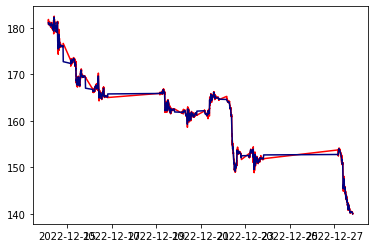

In [132]:
strategy.plot()